# Import Libraries

In [ ]:
import tensorflow as tf
import urllib.request
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

# Download and Prepare Datasets

In [ ]:
# training dataset url
training_url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
# training file name and directory
training_file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
# download the training dataset
urllib.request.urlretrieve(training_url, training_file_name)

# extract to directory
zip_ref = zipfile.ZipFile(training_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

# validation dataset url
validation_url = "https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip"
# validation file name and directory
validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
# download the validation data set
urllib.request.urlretrieve(validation_url, validation_file_name)

# extract to directory
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

# Create Data Generators for Training and Validation Datasets

In [ ]:
# all images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

# all images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1/255.)
validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Create the Model

In [ ]:
# create the model
model = tf.keras.models.Sequential([
    # note the input shape is the desired size of the image 300x300 with 3 bytes color
    # this is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # the second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # the third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # the fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # the fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 35, 35, 64)       

# Compile the Model

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
33/33 [==============================] - 33s 924ms/step - loss: 0.7245 - accuracy: 0.5141 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/20
33/33 [==============================] - 33s 1s/step - loss: 0.7027 - accuracy: 0.5979 - val_loss: 0.7010 - val_accuracy: 0.5000
Epoch 3/20
33/33 [==============================] - 30s 925ms/step - loss: 0.6252 - accuracy: 0.6650 - val_loss: 0.6609 - val_accuracy: 0.4961
Epoch 4/20
33/33 [==============================] - 38s 1s/step - loss: 0.5494 - accuracy: 0.7176 - val_loss: 0.7632 - val_accuracy: 0.5156
Epoch 5/20
33/33 [==============================] - 31s 935ms/step - loss: 0.4620 - accuracy: 0.7770 - val_loss: 0.9072 - val_accuracy: 0.5820
Epoch 6/20
33/33 [==============================] - 30s 924ms/step - loss: 0.4224 - accuracy: 0.7887 - val_loss: 1.1899 - val_accuracy: 0.5195
Epoch 7/20
33/33 [==============================] - 32s 966ms/step - loss: 0.4205 - accuracy: 0.8092 - val_loss: 0.5622 - val_accuracy: 0.5859
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


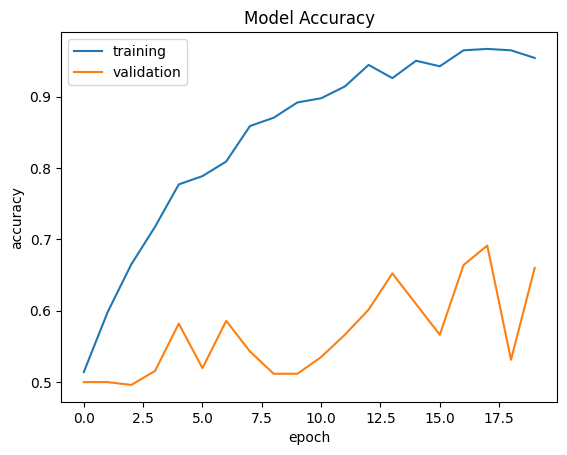

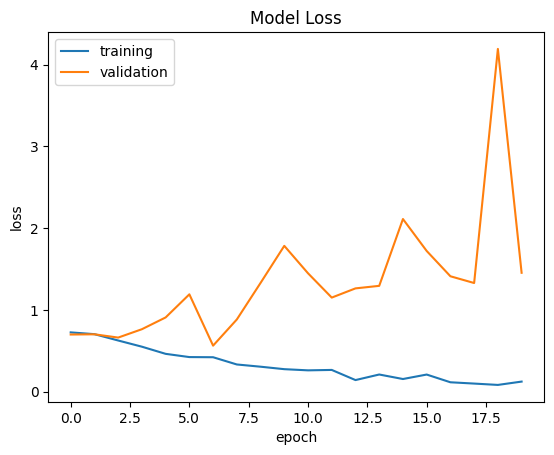

In [ ]:
print(history.history.keys())

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
vavlidation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# print(f'training loss: {training_loss}')
# print(f'training accuracy: {training_accuracy}')
# print(f'validation loss: {vavlidation_loss}')
# print(f'validation accuracy: {validation_accuracy}')

# plot accuracy training vs. validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# plot loss training vs. validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# Test Actual Images

## Download the Images

In [ ]:
actual_images_dl = 'https://drive.google.com/uc?export=download&id=1guy6SPfNId625-dDk43w5bxKeZX0luwt'
filename = "actual_samples.zip"
dir = 'actual_samples'

urllib.request.urlretrieve(actual_images_dl, filename)

# extract to directory
zip_ref = zipfile.ZipFile(filename, 'r')
zip_ref.extractall(dir)
zip_ref.close()

## Function for Printing Horse or Human

In [ ]:
def horse_or_human(filename, result):
  if result > 0.5:
    print(f'{filename} is a human')
  else:
    print(f'{filename} is a horse')

1/1 [==============================] - 0s 81ms/step
image1.jpg is a human


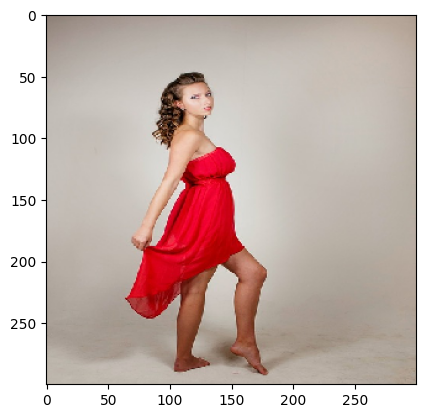

In [ ]:
# image1.jpg
image1 = image.load_img(dir + '/image1.jpg', target_size = (300, 300))
# show image
plt.imshow(image1)
# convert image to tensor
image1_np = image.img_to_array(image1) / 255.
image1_np = np.expand_dims(image1_np, axis=0) # extend to make 3D array
image1_tensor = np.vstack([image1_np])
# make inference
classes = model.predict(image1_tensor)
result = classes[0]
horse_or_human('image1.jpg', result)

1/1 [==============================] - 0s 20ms/step
image2.jpg is a horse


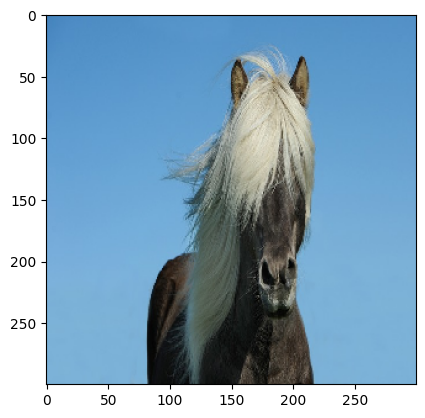

In [ ]:
# image2.jpg
image2 = image.load_img(dir + '/image2.jpg', target_size = (300, 300))
# show image
plt.imshow(image2)
# convert image to tensor
image2_np = image.img_to_array(image2) / 255.
image2_np = np.expand_dims(image2_np, axis=0) # extend to make 3D array
image2_tensor = np.vstack([image2_np])
# make inference
classes = model.predict(image2_tensor)
result = classes[0]
horse_or_human('image2.jpg', result)

1/1 [==============================] - 0s 21ms/step
image3.jpg is a human


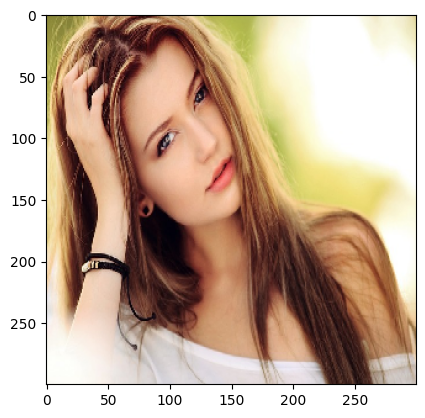

In [ ]:
# image3.jpg
image3 = image.load_img(dir + '/image3.jpg', target_size = (300, 300))
# show image
plt.imshow(image3)
# convert image to tensor
image3_np = image.img_to_array(image3) / 255.
image3_np = np.expand_dims(image3_np, axis=0) # extend to make 3D array
image3_tensor = np.vstack([image3_np])
# make inference
classes = model.predict(image3_tensor)
result = classes[0]
horse_or_human('image3.jpg', result)